## Modelling Notebook

This notebook is to be used for testing out the various models that you want to use. No preprocessing will be done in this notebook. Steps:

1. Read in `input/train.csv`,`input/test.csv`,`input/validation.csv` that you created in the `Data Cleaning.ipynb`
2. Train your model(s) on `input/train.csv` and EVALUATE (no training) with appropriate metrics (accuracy/MSE etc) on `input/validation.csv` 
3. Pick a final model and EVALUATE(no training) on `input/test.csv` and print metrics
3. Pick a final model and save it as `models/model.pkl`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers,Sequential,regularizers

In [2]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")
validation=pd.read_csv("../input/validation.csv")

In [3]:
def split_X_and_y(df,target):
    X=df.drop(columns=[target])
    y=df[target]
    return X,y

In [4]:
X_train,y_train=split_X_and_y(train,"genre")
X_test,y_test=split_X_and_y(test,"genre")
X_val,y_val=split_X_and_y(validation,"genre")

In [5]:
X_train.shape

(2010, 39)

In [6]:
model=Sequential()
model.add(layers.Dense(90,input_shape=(X_train.shape[1],),activation="relu"))
model.add(layers.Dense(45,activation="relu"))
model.add(layers.Dense(45,activation="relu"))
model.add(layers.Dense(45,activation="relu"))
model.add(layers.Dense(45,activation="relu"))
model.add(layers.Dense(9,activation="softmax"))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [7]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200)

Epoch 1/200
63/63 [==============================] - 3s 7ms/step - loss: 2.1808 - accuracy: 0.1512 - val_loss: 2.1555 - val_accuracy: 0.1582
Epoch 2/200
63/63 [==============================] - 0s 3ms/step - loss: 2.0343 - accuracy: 0.2433 - val_loss: 1.9618 - val_accuracy: 0.2328
Epoch 3/200
63/63 [==============================] - 0s 4ms/step - loss: 1.8623 - accuracy: 0.2861 - val_loss: 1.8457 - val_accuracy: 0.3075
Epoch 4/200
63/63 [==============================] - 0s 3ms/step - loss: 1.7859 - accuracy: 0.3244 - val_loss: 1.8645 - val_accuracy: 0.3164
Epoch 5/200
63/63 [==============================] - 0s 4ms/step - loss: 1.7997 - accuracy: 0.3010 - val_loss: 1.8252 - val_accuracy: 0.2955
Epoch 6/200
63/63 [==============================] - 0s 3ms/step - loss: 1.7333 - accuracy: 0.3418 - val_loss: 1.7624 - val_accuracy: 0.3373
Epoch 7/200
63/63 [==============================] - 0s 3ms/step - loss: 1.6777 - accuracy: 0.3667 - val_loss: 1.7580 - val_accuracy: 0.2836
Epoch 8/200
6

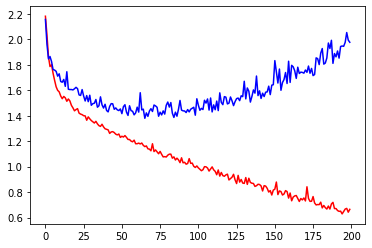

In [8]:
plt.plot(history.history["loss"],color="red")
plt.plot(history.history["val_loss"],color="blue")

In [9]:
model.save("../models/MFCC_Recognition")

INFO:tensorflow:Assets written to: ../models/MFCC_Recognition\assets
